In [4]:
import numpy as np
import matplotlib.pyplot as plt 


In [5]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Initialize weights and bias
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            # Gradient calculations
            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / num_samples) * np.sum(y_pred - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        y_pred_class = [1 if i > 0.5 else 0 for i in y_pred]
        return y_pred_class


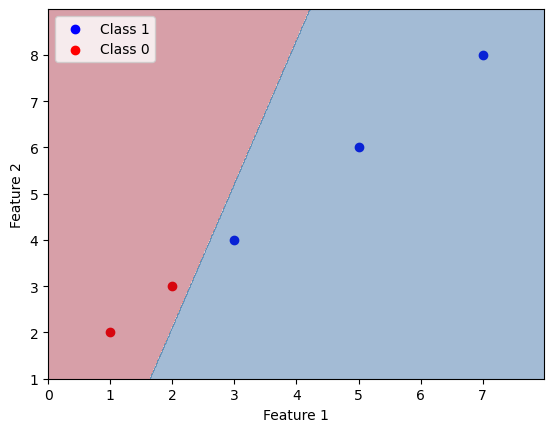

In [6]:

# Example usage:
if __name__ == "__main__":
    # Sample data
    X = np.array([[1, 2], [2, 3], [3, 4], [5, 6], [7, 8]])
    y = np.array([0, 0, 1, 1, 1])

    # Initialize and train the logistic regression model
    model = LogisticRegression(learning_rate=0.1, num_iterations=1000)
    model.fit(X, y)

    # Create a scatter plot of the data points
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='b', label='Class 1')
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='r', label='Class 0')

    # Plot the decision boundary
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
    Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = np.array(Z).reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap='RdBu')

    # Add labels and legend
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(loc='best')

    # Show the plot
    plt.show()